# Trial file

In [19]:
import torch 
import torch.nn as nn
from torch.nn import TransformerEncoder, TransformerEncoderLayer, MultiheadAttention
import sys
from torchtext.vocab import GloVe
import torchtext
import spacy 
from transformers import AutoTokenizer
import pandas as pd
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, Dataset
import csv
from utils import get_positional_encoding_single_sent
from utils import JustDataset
import math
from My_Dataset import My_Dataset
from utils import convert_pos_tags_list_into_list_of_indices_given_vocab
from Encoder import Encoder_Sentiment_Analysis
from tqdm.notebook import tqdm

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

rcParams['figure.figsize'] = 14, 7

- tyring to use the TransformerEncoderLayer

In [3]:
d = pd.read_csv('../datasets/train.csv')
print(d.shape)

(92228, 3)


In [5]:
d.head()

,text_id,sentence,gold_label
0,r1-0051002,"Cheers,\n\nDennis Nguyen\n416-879-6431",0
1,r1-0020356,May have to wait longer on holidays.,-1
2,r1-0058348,"I drove to vegas may 6th, to get my hair done.",0
3,r1-0080006,"In addition, I eat out often at various restau...",1
4,r1-0000827,Perhaps she was doing us a favor?,0


In [158]:
batch_size = 16
seq_len = 20
input_dim = 50

In [2]:
dat = torch.load('my_dataset.pt')

In [22]:
loader = DataLoader(dat, batch_size=3, shuffle=True)
print(len(loader))

30743


In [23]:
for i in loader:
    print(i)
    print(len(i))
    for t in i:
        print(type(t))
    break

[tensor([[[ 0.0000,  1.0000,  0.0000,  ...,  1.0000,  0.0000,  1.0000],
         [ 1.7906,  0.1906,  1.1192,  ...,  1.3623, -0.7250,  0.3911],
         [ 1.2589, -0.0147,  0.9700,  ...,  1.7037,  0.5762,  1.4351],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.6226,  1.0719,  0.0243,  ...,  1.1811,  0.0390,  1.2385],
         [ 1.2595,  0.7900,  0.2255,  ...,  0.8159, -0.1150,  0.2142],
         [ 1.2474,  0.1250,  1.4312,  ...,  1.8751,  0.2959,  1.2136],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  1.0000,  0.0000,  ...,  1.0000,  0.0000,  1.0000],
         [ 1.1981,  1.1600, -0.0784,  ...,  

In [24]:
a, b, c = i[0], i[1], i[2]

In [25]:
print(a.shape)

torch.Size([3, 256, 50])


In [26]:
print(b)

[tensor([11, 16, 11]), tensor([16,  6, 16]), tensor([6, 8, 6]), tensor([ 8, 10,  0]), tensor([1, 6, 6]), tensor([8, 8, 0]), tensor([14, 18,  8]), tensor([11, 18,  2]), tensor([11, 18, 18]), tensor([ 3, 18, 18]), tensor([ 2, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18]), tensor([18, 18, 18

In [27]:
print(c)

('0', '0', '0')


In [30]:
t = ['1', '1', '0', '-1']
t_i = list(map(int, t))
t_i

[1, 1, 0, -1]

In [159]:
inputs = torch.randn(batch_size, seq_len, input_dim)
print(f"inputs.shape = {inputs.shape}")

inputs.shape = torch.Size([16, 20, 50])


In [160]:
hidden_dim = 256
num_heads = 10
dropout_prob = 0.1

encoder_layer = TransformerEncoderLayer(input_dim, num_heads, hidden_dim, dropout_prob, activation='relu', batch_first=True)
encoder_layer

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=50, out_features=50, bias=True)
  )
  (linear1): Linear(in_features=50, out_features=256, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=256, out_features=50, bias=True)
  (norm1): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [129]:
for p in encoder_layer.self_attn.parameters():
    print(p.shape)

torch.Size([150, 50])
torch.Size([150])
torch.Size([50, 50])
torch.Size([50])


In [125]:
output = encoder_layer(inputs)
print(type(output)) # Tensor
print(f"output.shape = {output.shape}") # (batch_size, seq_len, input_dim)

<class 'torch.Tensor'>
output.shape = torch.Size([16, 20, 50])


In [168]:
a = torch.randn(100, 20, 50) # (batch_size, seq_len, input_dim)
torch.min(a, dim=1)[0].shape

torch.Size([100, 50])

In [167]:
torch.mean(a, dim=2).shape

torch.Size([100, 20])

In [161]:
encoder_main = TransformerEncoder(encoder_layer, num_layers=4)
encoder_main

TransformerEncoder(
  (layers): ModuleList(
    (0-3): 4 x TransformerEncoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=50, out_features=50, bias=True)
      )
      (linear1): Linear(in_features=50, out_features=256, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (linear2): Linear(in_features=256, out_features=50, bias=True)
      (norm1): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
)

In [162]:
main_output = encoder_main(inputs)
print(f"main_output.shape = {main_output.shape}")

main_output.shape = torch.Size([16, 20, 50])


- let's load a small dataset

In [8]:
with open('sentiment labelled sentences/amazon_cells_labelled.txt', 'r') as f: 

    # lines = f.readlines()
    # print(lines)
    # for line in f: 
    #     print(line)
    raw_data = f.read()

In [11]:
data = raw_data.split('\n')
data.pop(-1)
data_text = []
data_labels = []

# print(raw_data)
# sys.exit()

for sent in data: 
    temp = sent.split('\t')
    data_text.append(temp[0])
    data_labels.append(int(temp[1]))
    
print(len(data_text))

1000


In [56]:
dim = 50

glove_path = 'glove.6B'

glove = GloVe(name='6B', dim=dim, cache=glove_path)
glove

- trying the pipeline for one sentence

In [81]:
glove['two']

tensor([ 0.5829,  0.3626,  0.3406,  0.3642,  0.3434,  0.7939, -0.9362,  0.1143,
        -0.6301, -0.5552, -0.2871, -0.4714, -0.7567,  0.6387,  0.2248, -0.6465,
        -0.0743, -0.3490, -0.9729, -0.5398,  0.0152,  0.2448,  0.6266,  0.0704,
        -0.5163, -1.2004,  0.3122, -0.4405, -0.2987, -0.5633,  4.0220,  0.3846,
        -0.0285,  0.0687,  1.0746,  0.4831,  0.2475,  0.2280, -0.3574,  0.4039,
        -0.5474,  0.1524,  0.4100,  0.1570,  0.0078, -0.0151, -0.2865, -0.1616,
        -0.3517, -0.8256])

In [2]:
ex_text = "This is an example text."
# tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
nlp = spacy.load('en_core_web_sm')

In [ ]:
nlp.vocab.

In [68]:
# doing lemmatization and generating the part_of_speech_tags

doc = nlp(ex_text.lower())
lemmas = [token.lemma_ for token in doc if token.is_alpha]
print(f"lemmas = {lemmas}")

pos_tags = [token.pos_ for token in doc if token.is_alpha]
print(f"pos_tags = {pos_tags}")

lemmas = ['this', 'be', 'an', 'example', 'text']
pos_tags = ['PRON', 'AUX', 'DET', 'NOUN', 'NOUN']


In [69]:
len_of_pos_tag_init = len(pos_tags)
print(len_of_pos_tag_init)

5


In [70]:
print(pos_tags)
print(len(pos_tags))

max_len = 10
if len_of_pos_tag_init < max_len:
    while len(pos_tags) < max_len:
        pos_tags.append('<PAD>')

print(pos_tags)
print(len(pos_tags))

['PRON', 'AUX', 'DET', 'NOUN', 'NOUN']
5
['PRON', 'AUX', 'DET', 'NOUN', 'NOUN', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
10


In [55]:
# lemmas will be converted to embeddings using glove(pre-trained)
# pos_tags will be converted to embeddings inside the model, these need to be learned
# positional encodings will be added to the lemma_embeddings before feeding into the model and along with pos_tags which are converted to embeddings
# inside the model and then added up to the 

def get_positional_encoding()




In [44]:
tokens = tokenizer(ex_text, return_tensors='pt')
tokens

{'input_ids': tensor([[ 101, 2023, 2003, 2019, 2742, 3793, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [51]:
vocab_size = tokenizer.vocab_size
print(f"vocab_size = {vocab_size}")

vocab_size = 30522


In [49]:
tokenizer.vocab

{'shifts': 12363,
 '1791': 14362,
 'harp': 14601,
 '##ahu': 21463,
 'escorting': 23831,
 'treatise': 15326,
 'killed': 2730,
 '##rd': 4103,
 'padres': 21577,
 'bulk': 9625,
 '##二': 30278,
 '##fan': 15143,
 'fat': 6638,
 'finite': 10713,
 'abandonment': 22290,
 'troops': 3629,
 'resign': 12897,
 '##bow': 18912,
 'contrast': 5688,
 '##rini': 22612,
 'barangay': 20937,
 'peptide': 25117,
 '36': 4029,
 'persisted': 19035,
 '##目': 30444,
 'surprises': 20096,
 'struggling': 8084,
 '375': 18034,
 'louie': 17438,
 'encouragement': 15846,
 'tokugawa': 22065,
 '[unused33]': 34,
 'quan': 24110,
 'ʐ': 1136,
 '148': 16459,
 '##bered': 22408,
 'apparently': 4593,
 '##itt': 12474,
 'nigeria': 7387,
 'կ': 1227,
 'hopeful': 17772,
 'office': 2436,
 '##ム': 30251,
 '##鈴': 30491,
 '##ovo': 16059,
 '書': 1871,
 '##ج': 29819,
 '##venting': 26703,
 'villagers': 11904,
 'portuguese': 5077,
 'cuisine': 12846,
 'ceramics': 17314,
 'colossal': 29523,
 'prominent': 4069,
 'plus': 4606,
 'л': 1190,
 'ringo': 25589,

In [50]:
for key, value in tokenizer.vocab.items(): 
    if value == 101:
        print(f"value = 101, key = {key}")
    elif value == 102: 
        print(f"value = 102, key = {key}")

value = 101, key = [CLS]
value = 102, key = [SEP]


# Bakchodi

In [4]:
a = nn.CrossEntropyLoss()

u1 = torch.randn(3, 3)
u2 = torch.LongTensor([2, 0, 1])

a(u1, u2)

tensor(1.3911)

In [2]:
a = Encoder_Sentiment_Analysis(50, 10)

AttributeError: cannot assign module before Module.__init__() call

In [72]:
obj = My_Dataset()

In [73]:
my_sent = 'Hello, my name is arnav, i have a big crush on someone i know, but i want her to be happy.'
temp = obj.pre_process_single_sent(my_sent)

In [76]:
print(type(temp))

<class 'tuple'>


In [84]:
a = convert_pos_tags_list_into_list_of_indices_given_vocab([temp[1]])

Started to map pos_tags into indices using vocab
Done mapping pos_tags to index 


In [5]:
dat = torch.load('my_dataset.pt')

In [6]:
print(type(dat[0]))

<class 'tuple'>


In [7]:
dat[0][0].shape

torch.Size([256, 50])

In [8]:
len(dat[0][1])

256

In [9]:
dat[0][2]

1

In [10]:
loader = DataLoader(dat, batch_size=4, shuffle=True)

In [11]:
temp = next(iter(loader))

In [12]:
print(type(temp))
print(len(temp))

<class 'list'>
3


In [13]:
temp[0].shape

torch.Size([4, 256, 50])

In [14]:
print(type(temp[1]))

<class 'list'>


In [15]:
print(len(temp[1]))

256


In [133]:
a = nn.CrossEntropyLoss()

u1 = torch.LongTensor([1, 2, 3])
u2 = torch.randn(3, 4)

a(u2, u1)

tensor(1.0727)

In [16]:
temp[2]

tensor([1, 2, 0, 0])

In [131]:
temp[2].dtype, temp[2]

(torch.int64, tensor([0, 1]))

In [109]:
a = torch.stack(temp[1], dim=1)
print(a.shape)

torch.Size([2, 256])


In [112]:
embd = nn.Embedding(19, 50)

In [115]:
TransformerEncoderLayer(50, 10)

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=50, out_features=50, bias=True)
  )
  (linear1): Linear(in_features=50, out_features=2048, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=2048, out_features=50, bias=True)
  (norm1): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [113]:
print(f'a.shape = {a.shape}')
b = embd(a)
print(f'b.shape = {b.shape}')

a.shape = torch.Size([2, 256])
b.shape = torch.Size([2, 256, 50])


In [111]:
a

tensor([[11, 16,  6,  8,  5, 11, 16, 11, 11, 10,  1, 11,  8,  8, 16, 11, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18,

In [110]:
temp[1]

[tensor([11,  8]),
 tensor([16,  8]),
 tensor([6, 8]),
 tensor([ 8, 16]),
 tensor([ 5, 12]),
 tensor([11,  8]),
 tensor([16,  5]),
 tensor([11, 11]),
 tensor([11,  3]),
 tensor([10,  1]),
 tensor([ 1, 11]),
 tensor([11,  8]),
 tensor([8, 1]),
 tensor([8, 8]),
 tensor([16, 18]),
 tensor([11, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),
 tensor([18, 18]),

In [85]:
print(type(a))

<class 'list'>


In [86]:
print(len(a))

1


In [88]:
print(len(a[0]))

256


In [78]:
print(len(temp[0]))

256


In [80]:
print(len(temp[1]))

256


In [82]:
temp[2]
print(len(temp[2]))

256


In [60]:
dat = torch.load("my_dataset1.pt")

In [61]:
train_loader = DataLoader(dat, batch_size=16, shuffle=True)

In [62]:
t = next(iter(train_loader))
print(type(t))
print(len(t))

<class 'list'>
3


In [67]:
a = [1, 2 ,3, 4, 5, 6, 7, 8]
print(a)
len_of_a = len(a)
max_len = 5

if len_of_a >= max_len:
    a = a[:max_len]

print(a)

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5]


In [63]:
a1, a2, a3 = t[0], t[1], t[2]

In [64]:
print(type(a1))
print(a1.shape)

<class 'torch.Tensor'>
torch.Size([16, 256, 50])


In [65]:
a2

[tensor([11,  6, 14, 11, 11,  6,  7,  6,  2, 16, 11,  8,  5, 11, 14, 11]),
 tensor([ 3,  8, 11, 16,  3,  8,  7,  8, 11,  2, 16,  1, 11, 16, 11,  8]),
 tensor([ 0,  8, 10,  8,  6,  3, 18,  8,  0, 16,  0,  8, 16,  6,  2, 16]),
 tensor([14,  1,  6,  3,  8,  0, 18,  3,  8,  8,  8,  8,  1,  8,  6, 11]),
 tensor([ 6,  6,  8,  2, 11, 11, 18,  0,  1,  5, 16,  8,  8, 16,  0,  5]),
 tensor([ 0,  8,  8,  3, 16, 12, 18,  2,  8,  8, 11,  3,  1,  1,  2, 11]),
 tensor([ 8,  2, 11, 11,  1,  3, 18,  0, 10,  2,  1,  0,  6, 11,  8, 16]),
 tensor([ 3, 16,  3,  0,  6, 16, 18, 18, 16, 11,  8, 16,  0, 18, 11,  6]),
 tensor([ 0,  6, 16,  8,  8, 18, 18, 18,  6, 16,  8,  0,  8, 18, 16,  8]),
 tensor([18,  8,  1,  2,  1, 18, 18, 18,  8,  1, 18,  8, 18, 18,  0,  1]),
 tensor([18,  1,  6,  8, 12, 18, 18, 18,  1,  8, 18,  1, 18, 18,  8,  6]),
 tensor([18,  8,  8, 18, 12, 18, 18, 18, 18,  5, 18,  6, 18, 18, 18,  8]),
 tensor([18, 18,  2, 18, 16, 18, 18, 18, 18,  8, 18,  8, 18, 18, 18, 11]),
 tensor([18, 18, 18, 18, 

In [59]:
sent = 'there is she.'
doc = nlp(sent.lower())
pos_tags = [token.pos_ for token in doc]
print(pos_tags)

['PRON', 'VERB', 'PRON', 'PUNCT']


In [51]:
print(type(a2))
print(len(a2))
a2

<class 'list'>
256


[tensor([10,  6,  8, 11,  3,  6,  1, 11,  7, 11,  0, 14, 11, 11, 11,  5]),
 tensor([ 2,  8,  3, 16, 16,  8,  6, 16,  7, 16,  8,  8, 16, 16, 16, 11]),
 tensor([ 3,  3,  0, 14,  1,  3,  8,  9, 11, 11,  1,  5,  1,  8,  6,  1]),
 tensor([12, 16, 16, 11, 12,  8,  1,  8, 16,  1,  8,  8,  8,  8,  8, 11]),
 tensor([16,  1,  6, 16,  8, 18,  6,  1, 11,  5,  6, 16,  1, 18,  1,  8]),
 tensor([ 6,  6,  8, 12,  1, 18,  8,  9,  8, 16, 11, 11,  6, 18,  8, 16]),
 tensor([ 8,  8,  8, 16, 12, 18,  1,  1, 11,  7,  3,  1,  8, 18,  6, 11]),
 tensor([ 1,  1,  3,  8, 12, 18, 11, 11,  3,  1, 16,  1,  8, 18,  8, 16]),
 tensor([ 6,  6,  0,  2, 11, 18, 18, 18,  2, 14, 11,  8,  1, 18,  1, 11]),
 tensor([ 0,  8,  5,  1, 16, 18, 18, 18,  0,  6, 12, 11,  6, 18,  8,  3]),
 tensor([ 8, 18, 11,  8,  6, 18, 18, 18, 10,  8, 12,  3,  8, 18,  8, 16]),
 tensor([ 1, 18, 16, 16, 16, 18, 18, 18, 16, 16, 12, 16,  8, 18,  3, 11]),
 tensor([12, 18,  2,  8,  8, 18, 18, 18, 18,  2,  8, 11, 18, 18, 11, 11]),
 tensor([ 8, 18, 10, 18, 

In [52]:
print(type(a3))
print(a3.shape)
print(a3)
print(a3.dtype)

<class 'torch.Tensor'>
torch.Size([16])
tensor([ 1,  0,  1,  1, -1,  1,  0,  0,  0,  0, -1,  1,  0,  0,  1, -1])
torch.int64


In [8]:
a = torch.randn(4)
print(a)

tensor([-0.3507,  0.3039,  1.4983, -1.1363])


In [10]:
mask = torch.LongTensor([1, 1, 0, 0])
print(mask == 0)
a.masked_fill(mask==0, 0)

tensor([False, False,  True,  True])


tensor([-0.3507,  0.3039,  0.0000,  0.0000])

In [23]:
def get_positional_encodings(length, mask, hidden_size):
    # Create a tensor with shape (length, hidden_size)
    # hidden_size = 512 # Change this to your desired hidden size
    position = torch.arange(0, length, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, hidden_size, 2, dtype=torch.float) * -(math.log(10000.0) / hidden_size))
    encodings = torch.zeros((length, hidden_size))
    encodings[:, 0::2] = torch.sin(position * div_term)
    encodings[:, 1::2] = torch.cos(position * div_term)
    # Apply the mask to zero out the padded tokens
    encodings = encodings.masked_fill(torch.LongTensor(mask).unsqueeze(1) == 0, 0)
    return encodings

In [24]:
get_positional_encodings(256, [1 for _ in range(200)] + [0 for _ in range(256-200)], 50)

tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  5.4030e-01,  6.3795e-01,  ...,  1.0000e+00,
          1.4454e-04,  1.0000e+00],
        [ 9.0930e-01, -4.1615e-01,  9.8254e-01,  ...,  1.0000e+00,
          2.8909e-04,  1.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])

In [25]:
a = torch.LongTensor([1, 2, 3]).unsqueeze(1)
print(a.shape)

torch.Size([3, 1])


In [17]:
t1 = [1 for _ in range(10)]
t0 = [0 for _ in range(20-10)]
t1 + t0

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [16]:
get_positional_encodings(4, [1, 1, 0, 0, 0, 0], 6)

tensor([[ 0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.5403,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.9093, -0.4161,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.1411, -0.9900,  0.0000,  0.0000,  0.0000,  0.0000]])

In [171]:
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data 
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        
        item = self.data[index]
        return item

In [183]:
dat = [([torch.randn(3, 1), [1, 2]], 0), ([torch.randn(3, 1), [3, 4]], 1)]
print(dat)
my = MyDataset(dat)

[([tensor([[-1.5550],
        [-0.3581],
        [-0.2756]]), [1, 2]], 0), ([tensor([[0.2463],
        [0.7705],
        [0.1469]]), [3, 4]], 1)]


In [189]:
dataloader = DataLoader(my, batch_size=2)

for inputs, labels in dataloader:
    print(inputs)
    print(labels)
    print('\n\n')

[tensor([[[-1.5550],
         [-0.3581],
         [-0.2756]],

        [[ 0.2463],
         [ 0.7705],
         [ 0.1469]]]), [tensor([1, 3]), tensor([2, 4])]]
tensor([0, 1])





In [205]:
a = inputs[1][0]
print(a)

tensor([1, 3])


In [207]:
b = a.tolist()
print(b)

[1, 3]


In [206]:
for i in a:
    print(i)

tensor(1)
tensor(3)


In [202]:
def a(x : torch.LongTensor):
    print(x.dtype)

In [203]:
a(torch.rand(3))

torch.float32


In [192]:
inputs[0].shape, inputs[1][0].shape, inputs[1][1].shape

(torch.Size([2, 3, 1]), torch.Size([2]), torch.Size([2]))

In [187]:
inputs[1][0].dtype

torch.int64

In [10]:
df = pd.read_csv('../datasets/train.csv')
df.head()

,text_id,sentence,gold_label
0,r1-0051002,"Cheers,\n\nDennis Nguyen\n416-879-6431",0
1,r1-0020356,May have to wait longer on holidays.,-1
2,r1-0058348,"I drove to vegas may 6th, to get my hair done.",0
3,r1-0080006,"In addition, I eat out often at various restau...",1
4,r1-0000827,Perhaps she was doing us a favor?,0


In [11]:
print(df.shape)

(92228, 3)


In [12]:
def read_csv(filename='../datasets/train.csv', column_name='sentence'):
    with open(filename, 'r') as f: 
        reader = csv.DictReader(f)
        for row in reader:
            yield row[column_name], row['gold_label']

    print("Successfully created generator object for the dataset")

In [13]:
my_text = df['sentence'].values.tolist()
my_labels = df['gold_label'].values.tolist()

In [14]:
print(len(my_text))
print(len(my_labels))

92228
92228


In [15]:
sent = my_text[0]
print(sent)

Cheers,

Dennis Nguyen
416-879-6431


In [77]:
sent.lower()

'cheers,\n\ndennis nguyen\n416-879-6431'

In [84]:
doc = nlp(sent.lower())
tok = [token.lemma_ for token in doc if token.is_alpha]
pos = [token.pos_ for token in doc if token.is_alpha]
pos

['NOUN', 'PROPN', 'PROPN']

In [85]:
len_list = [len(s) for s in my_text]
print(len_list)

[35, 36, 47, 173, 33, 55, 112, 90, 64, 72, 107, 131, 84, 107, 69, 62, 117, 142, 46, 47, 81, 28, 69, 27, 30, 29, 74, 178, 64, 14, 90, 71, 81, 73, 58, 138, 55, 27, 60, 71, 76, 49, 65, 90, 11, 52, 42, 52, 80, 46, 60, 48, 132, 101, 115, 51, 13, 44, 42, 76, 22, 17, 238, 79, 20, 95, 22, 213, 74, 200, 75, 141, 48, 33, 40, 36, 84, 19, 66, 130, 102, 30, 74, 76, 102, 10, 16, 40, 54, 92, 49, 40, 96, 20, 178, 96, 17, 117, 107, 17, 37, 99, 104, 95, 103, 79, 81, 43, 42, 58, 68, 28, 25, 94, 76, 63, 71, 64, 45, 139, 63, 51, 15, 118, 201, 148, 7, 31, 53, 77, 17, 25, 78, 19, 33, 87, 45, 74, 17, 26, 81, 126, 67, 12, 32, 43, 70, 104, 63, 70, 25, 89, 32, 55, 85, 32, 46, 39, 28, 73, 87, 82, 141, 137, 62, 173, 71, 81, 108, 18, 10, 71, 37, 42, 42, 85, 64, 164, 96, 57, 36, 25, 52, 27, 30, 82, 84, 113, 65, 23, 5, 136, 165, 76, 32, 26, 53, 77, 39, 54, 88, 7, 28, 66, 27, 91, 98, 151, 34, 101, 150, 54, 88, 56, 67, 77, 100, 89, 102, 133, 65, 57, 40, 132, 67, 48, 11, 21, 77, 103, 39, 33, 14, 105, 52, 22, 56, 60, 14,

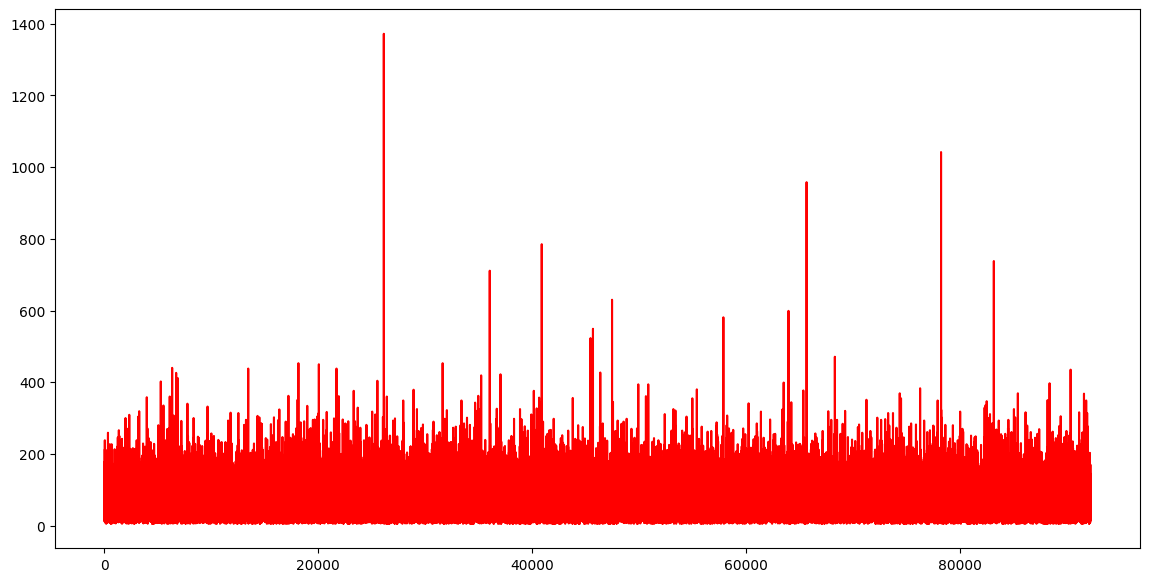

In [91]:
plt.plot(np.arange(len(len_list)), np.array(len_list), 'r-');

In [93]:
some = []
for text in my_text:
    if len(text) > 256:
        some.append(text)

print(len(some))

300


In [11]:
get_positional_encoding_single_sent([1, 1, 0, 0], 4, 2)

Start generating positional encodings


TypeError: sin(): argument 'input' (position 1) must be Tensor, not float

In [3]:
torch.sin(torch.randn(1))

tensor([0.9842])

In [103]:
glove['<PAD>']

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [96]:
with open("trunc.txt", "a") as f: 
    for sent in some: 
        f.write(f"{sent}\n\n")

In [17]:
nlp = spacy.load('en_core_web_sm')
nlp

In [20]:
lemma_list = []

for sent in tqdm(my_text):
    doc = nlp(sent.lower())
    temp = [token.lemma_ for token in doc if token.is_alpha]
    lemma_list.append(temp)

  0%|          | 0/92228 [00:00<?, ?it/s]

In [21]:
lemma_len_list = [len(x) for x in lemma_list]
print(lemma_len_list)

[3, 7, 10, 32, 7, 10, 24, 16, 13, 14, 19, 25, 16, 21, 16, 10, 23, 24, 7, 8, 16, 6, 17, 6, 4, 6, 12, 33, 9, 2, 16, 13, 14, 16, 11, 25, 11, 6, 11, 15, 16, 11, 11, 15, 2, 9, 8, 9, 18, 9, 9, 10, 25, 19, 24, 9, 1, 8, 7, 13, 4, 3, 31, 18, 3, 17, 5, 40, 10, 35, 13, 18, 8, 5, 8, 8, 16, 4, 14, 24, 22, 6, 13, 13, 22, 1, 3, 9, 8, 19, 9, 8, 20, 3, 36, 18, 4, 20, 22, 3, 7, 17, 20, 18, 17, 14, 15, 6, 10, 13, 14, 7, 4, 17, 14, 11, 12, 13, 9, 27, 11, 8, 3, 23, 41, 29, 1, 6, 10, 12, 3, 4, 16, 3, 6, 16, 9, 14, 5, 5, 18, 21, 16, 2, 5, 9, 13, 21, 11, 15, 4, 17, 6, 8, 17, 6, 9, 7, 5, 14, 17, 18, 27, 26, 13, 35, 12, 13, 24, 2, 2, 13, 5, 7, 9, 17, 11, 29, 19, 12, 6, 3, 9, 4, 6, 14, 16, 21, 11, 4, 0, 26, 29, 16, 6, 4, 9, 15, 8, 10, 18, 1, 5, 11, 3, 16, 19, 30, 6, 17, 28, 10, 16, 13, 13, 12, 18, 16, 21, 27, 12, 10, 9, 25, 12, 9, 2, 3, 14, 22, 7, 7, 2, 22, 9, 5, 9, 10, 3, 22, 4, 6, 11, 11, 24, 21, 13, 11, 27, 7, 35, 44, 15, 27, 1, 7, 22, 9, 14, 7, 12, 31, 8, 11, 2, 27, 7, 20, 19, 4, 13, 14, 2, 23, 5, 21, 18, 30

In [28]:
import statistics

In [24]:
my_mean = sum(lemma_len_list) / len(lemma_len_list)
print(my_mean)

13.075129028060893


In [25]:
max(lemma_len_list)

258

In [29]:
median = statistics.median(lemma_len_list)
print(median)

12.0


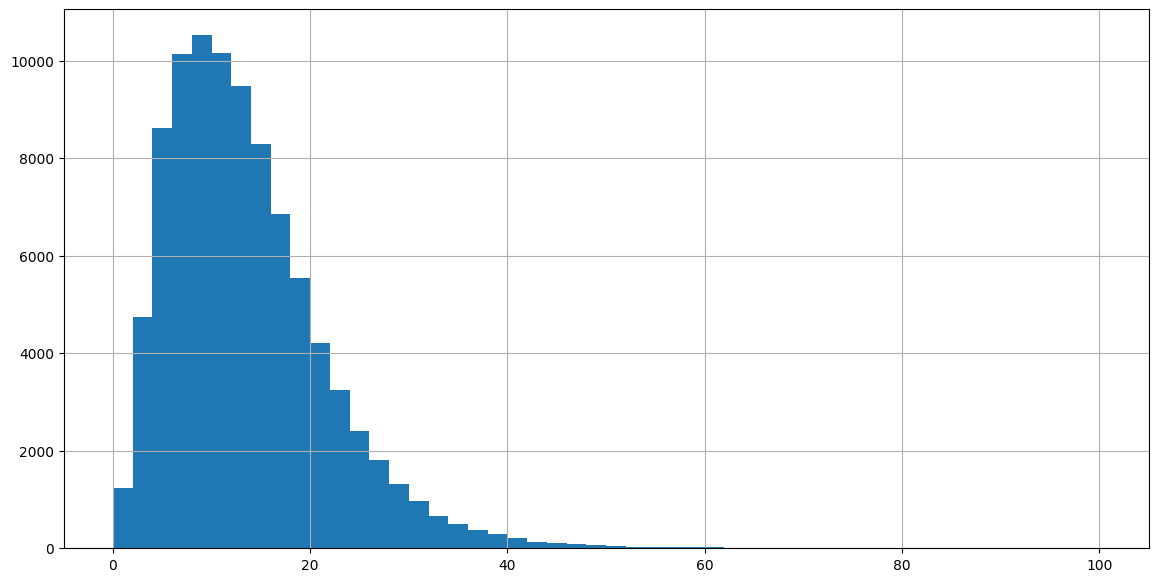

In [32]:
plt.hist(lemma_len_list, range=(0, 100), bins=50)
plt.grid()
plt.savefig('lemma_len_list.png')

In [33]:
test_df = pd.read_csv('../datasets/test.csv')
print(test_df.shape)

(5110, 2)


In [34]:
test_df.head()

,text_id,sentence
0,r1-0086521,A helpful valet at the Bellagio said it was a ...
1,r1-0044715,"People often ask ""what happened to the human c..."
2,r1-0060690,He explained there would be a diagnostic fee o...
3,r1-0016852,I had initially purchased a massage on Groupon.
4,r2-0006040,Primarily do high-end cars as they get referra...


In [35]:
my_test_text = test_df['sentence'].tolist()

test_lemma_list = []

for sent in tqdm(my_test_text):
    doc = nlp(sent.lower())
    temp = [token.lemma_ for token in doc if token.is_alpha]
    test_lemma_list.append(temp)

  0%|          | 0/5110 [00:00<?, ?it/s]

In [36]:
len_lemma_test = [len(x) for x in test_lemma_list]

In [37]:
test_mean = statistics.mean(len_lemma_test)
test_median = statistics.median(len_lemma_test)
test_max = max(len_lemma_test)

print(test_mean)
print(test_median)
print(test_max)

13.147553816046967
12.0
141


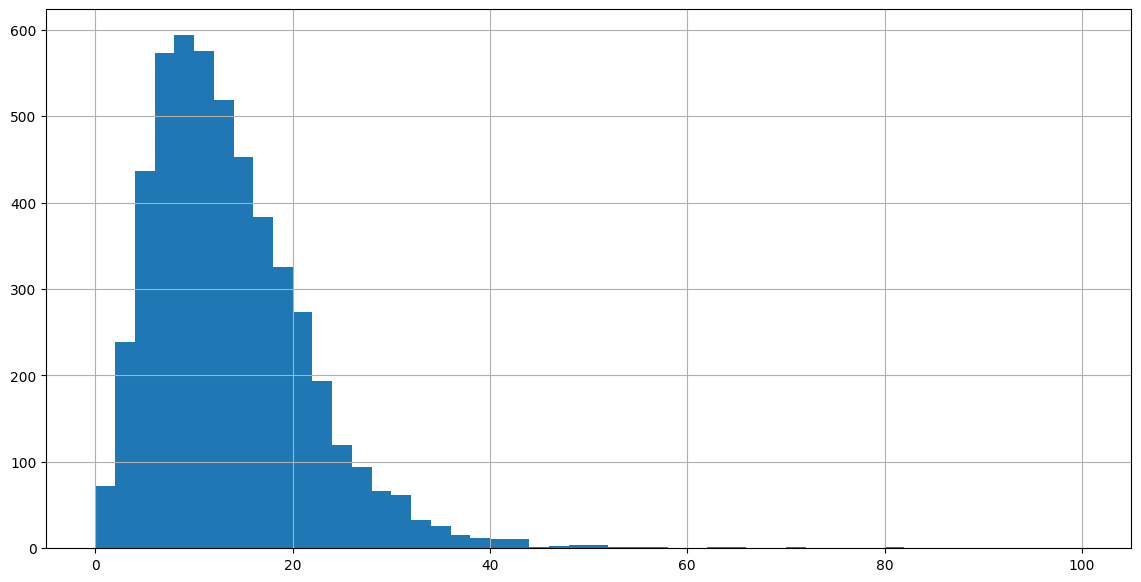

In [40]:
plt.hist(len_lemma_test, bins=50, range=(0, 100))
plt.grid()
plt.savefig('test_len.png');

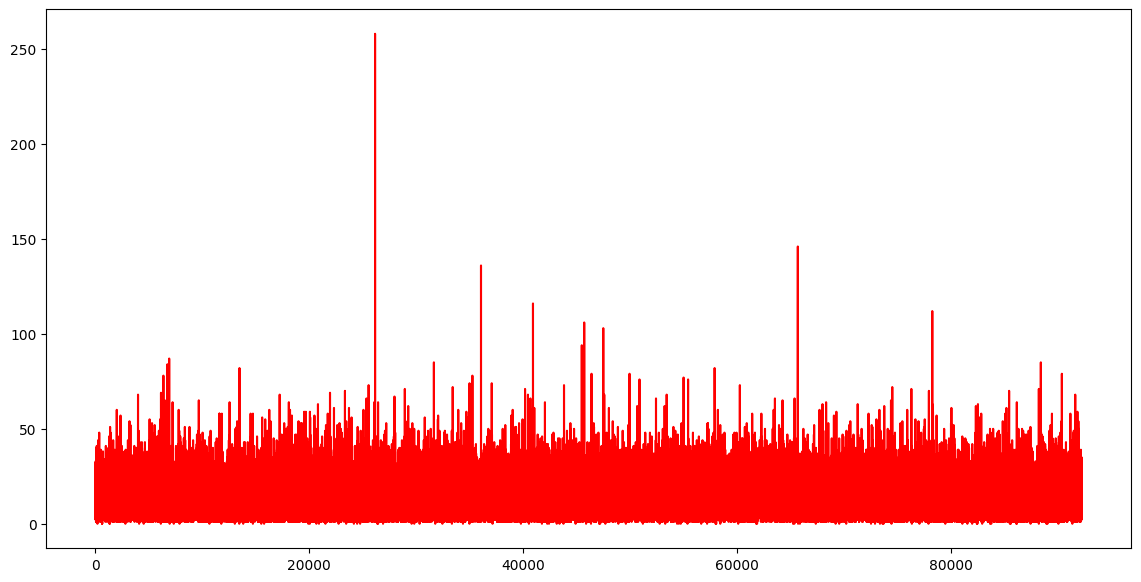

In [100]:
plt.plot(np.arange(len(lemma_len_list)), np.array(lemma_len_list), 'r-');

In [101]:
lemma_list[lemma_len_list.index(max(lemma_len_list))]

['as',
 'soon',
 'as',
 'we',
 'get',
 'the',
 'chance',
 'and',
 'know',
 'what',
 'we',
 'want',
 'we',
 'both',
 'order',
 'alfredo',
 'mine',
 'be',
 'seafood',
 'and',
 'my',
 'friend',
 'be',
 'grill',
 'chicken',
 'we',
 'order',
 'the',
 'risotto',
 'bite',
 'for',
 'an',
 'appetizer',
 'they',
 'be',
 'a',
 'cheesy',
 'risotto',
 'ball',
 'and',
 'it',
 'be',
 'dip',
 'in',
 'batter',
 'and',
 'deep',
 'fry',
 'with',
 'a',
 'homemade',
 'crush',
 'tomatoe',
 'sauce',
 'and',
 'shred',
 'cheese',
 'on',
 'top',
 'one',
 'of',
 'our',
 'favorite',
 'thing',
 'about',
 'olive',
 'garden',
 'be',
 'the',
 'endless',
 'soup',
 'salad',
 'and',
 'breadstick',
 'and',
 'let',
 'I',
 'tell',
 'you',
 'what',
 'she',
 'keep',
 'it',
 'come',
 'she',
 'keep',
 'offer',
 'we',
 'the',
 'freshly',
 'shred',
 'cheese',
 'which',
 'be',
 'absolutely',
 'delicious',
 'and',
 'when',
 'I',
 'ready',
 'she',
 'bring',
 'we',
 'the',
 'amazing',
 'alfredo',
 'even',
 'throughout',
 'the',
 'me

In [72]:
my_text

['Cheers,\n\nDennis Nguyen\n416-879-6431',
 'May have to wait longer on holidays.',
 'I drove to vegas may 6th,  to get my hair done.',
 'In addition, I eat out often at various restaurants in Cleveland and it is of my opinion that alfresco dining is over rated but not a true statement  for Sanctuary on Green.',
 'Perhaps she was doing us a favor?',
 "I checked my Magic Eight Ball for the Diamond's future.",
 'This place has Dim Sum 7 days a week and they make it fresh to order, that is if you think 10 days old is fresh.',
 "They don't take credit card below a certain amount - I forget exactly but I wanna say $10.",
 "I have a pal who's going to tell me the same story occasionally!",
 'Chili is an item that never needs to be shorted, should always be ready.',
 'I came here with some crooked,  thick, extremely long, over priced nails from Fancy Nail Salon on Craig Rd.',
 "The only complaint - as we tried to dress as best as possible, I was astonished to see a couple at the next table we

In [139]:
a = 'groseriehjksy'
doc = nlp(a.lower())

pos = [token.pos_ for token in doc if token.is_alpha]
print(pos)

['VERB']


In [141]:
emb = nn.Embedding(18, 50)
emb

Embedding(18, 50)

In [146]:
i1 = torch.LongTensor([1])
o1 = emb(i1)

i2 = torch.LongTensor([2])
o2 = emb(i2)

o = torch.cat([o1, o2], dim=0)
print(o.shape)

torch.Size([2, 50])


In [147]:
a = torch.FloatTensor([1])
print(a.dtype)

torch.float32


In [155]:
a = nn.Embedding(10, 10)
b = torch.LongTensor([0, 2, 4])
a(b).shape

torch.Size([3, 10])

In [157]:
a = [torch.LongTensor([0]), torch.LongTensor([1])]
b = torch.cat(a)
print(b.shape)
print(b)

torch.Size([2])
tensor([0, 1])


In [154]:
a = nn.CrossEntropyLoss()
i1 = torch.LongTensor([0, 1])
i2 = torch.randn(2, 3)

a(i2, i1)

tensor(1.5358)

In [143]:
o.shape

torch.Size([1, 50])

In [209]:
from utils import convert_pos_tags_list_into_list_of_indices_given_vocab

In [210]:
convert_pos_tags_list_into_list_of_indices_given_vocab([['ADJ', 'NOUN']])

[[0, 8]]

In [215]:
torch.rand(3, 4) + torch.rand(3, 4)

tensor([[0.1415, 0.2692, 0.4698, 0.9126],
        [1.2626, 0.3625, 0.9990, 1.0353],
        [0.5276, 0.8022, 1.0116, 0.7991]])

In [140]:
t1 = [1, 2, 3]
t2 = [4, 5, 6]
t1 + t2

[1, 2, 3, 4, 5, 6]

In [38]:
enc_out = torch.randn(10, 20, 128) # (seq_len, batch_size, input_dim)
pooled_out = torch.mean(enc_out, dim=0)
print(pooled_out.shape) # (batch_size, input_dim), (20, 128)

torch.Size([20, 128])


In [111]:
a = [1, 2, 3]
a.pop(-1)

3

In [105]:
glove['hello'].shape

torch.Size([50])

In [106]:
a = [torch.randn(50), torch.randn(50), torch.randn(50)]
b = torch.stack(a, dim=0)
print(b.shape)

torch.Size([3, 50])


In [113]:
x = torch.stack([torch.randn(3, 50), torch.randn(3, 50), torch.randn(3, 50), torch.randn(3, 50)])
y = torch.stack([torch.randn(1), torch.randn(1), torch.randn(1), torch.randn(1)])

dat = TensorDataset(x, y)

In [114]:
for x_i, y_i in dat: 
    print(f"x_i.shape = {x_i.shape}, y_i.shape = {y_i.shape}")

x_i.shape = torch.Size([3, 50]), y_i.shape = torch.Size([1])
x_i.shape = torch.Size([3, 50]), y_i.shape = torch.Size([1])
x_i.shape = torch.Size([3, 50]), y_i.shape = torch.Size([1])
x_i.shape = torch.Size([3, 50]), y_i.shape = torch.Size([1])


In [115]:
dat_load = DataLoader(dat, batch_size=2, shuffle=False)
for b_x, b_y in dat_load:
    print(f"b_x.shape = {b_x.shape}, b_y.shape = {b_y.shape}")

b_x.shape = torch.Size([2, 3, 50]), b_y.shape = torch.Size([2, 1])
b_x.shape = torch.Size([2, 3, 50]), b_y.shape = torch.Size([2, 1])


In [116]:
torch.transpose(b_x, 0, 1).shape

torch.Size([3, 2, 50])

In [80]:
sys.argv[0]

'/Users/arnav39/Desktop/project1/venv/lib/python3.10/site-packages/ipykernel_launcher.py'

In [59]:
input_dim = 512
batch_size = 10
seq_len = 20
inputs = torch.randn(seq_len, batch_size, input_dim)
print(f"inputs.shape = {inputs.shape}")

inputs.shape = torch.Size([20, 10, 512])


In [60]:
num_heads = 2
hidden_dim = 64
dropout_prob = 0.1
multihead_attn = MultiheadAttention(input_dim, num_heads)

In [61]:
a = nn.MultiheadAttention(input_dim, num_heads)
a

MultiheadAttention(
  (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
)

In [62]:
for p in a.parameters():
    print(p.shape)

torch.Size([1536, 512])
torch.Size([1536])
torch.Size([512, 512])
torch.Size([512])


In [63]:
out = multihead_attn(inputs, inputs, inputs)

In [66]:
print(type(out))
print(type(out[0]), type(out[1]))
print(out[0].shape)
print(out[1].shape)

<class 'tuple'>
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([20, 10, 512])
torch.Size([10, 20, 20])


In [69]:
torch.sum(out[1][0], dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000], grad_fn=<SumBackward1>)

In [117]:
(1, 2, 3)

(1, 2, 3)

In [22]:
a = nn.Linear(32, 4)
for p in a.parameters():
    print(p.shape)

torch.Size([4, 32])
torch.Size([4])


In [10]:
a = torch.nn.LayerNorm(4)
a

LayerNorm((4,), eps=1e-05, elementwise_affine=True)

In [14]:
b = torch.randn(3, 4) * 100
print(b)
print(a(b))

tensor([[ 74.2838, -27.1881, 216.1709, -58.0535],
        [ 97.4849,  40.5403,  52.5544, -86.4391],
        [ 60.4851, -78.6455, -32.0873,  98.5458]])
tensor([[ 0.2147, -0.7333,  1.5403, -1.0217],
        [ 1.0458,  0.2123,  0.3882, -1.6463],
        [ 0.6846, -1.2829, -0.6245,  1.2228]],
       grad_fn=<NativeLayerNormBackward0>)


In [5]:
a = torch.LongTensor([0, 1, 2, 3])
print(a.dtype)
print(a)

torch.int64
tensor([0, 1, 2, 3])


In [7]:
b = nn.Embedding(4, 12)
c = b(a)
print(f"c.shape = {c.shape}")

c.shape = torch.Size([4, 12])


In [2]:
import sys
import os

In [3]:
input_dir = sys.argv[1]
output_dir = sys.argv[2]

submit_dir = os.path.join(input_dir, 'res')
truth_dir = os.path.join(input_dir, 'ref')

In [4]:
print(submit_dir)

--ip=127.0.0.1/res


In [5]:
print(truth_dir)

--ip=127.0.0.1/ref
